In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_excel("E:\ICC Test Bat 3001.xlsx")

In [4]:
data

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2997,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2998,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...
2999,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...


# Data cleaning

Remove the unwanted columns

In [5]:
data=data.drop(columns=["Player Profile"])

In [6]:
data.index = range(1, len(data) + 1)

In [7]:
data.head(50)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
1,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
5,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
6,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11
7,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17
8,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15
9,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
10,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11


In [8]:
data.isnull().sum()

Player    0
Span      0
Mat       0
Inn       0
NO        0
Runs      0
HS        0
Avg       0
100       0
50        0
0         0
dtype: int64

In [9]:
data

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0
1,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
2,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
3,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
4,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
5,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-
2998,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-
2999,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-
3000,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-


Replace the column name

In [10]:
data1=data.rename(columns={100:"Hundred",
                         50:"Fifty",
                         0:'Zero',
                         'AVG':'avg'
                         })

Replace the  '-'  value to NaN value

Why replace that "-" symbol because some ifen is there in my dataset. But are not consider this ifens are null value.So i replace the null values after i remove that rows

In [11]:
data1.replace("-", np.nan, inplace=True)

In [12]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921.0,248*,53.78,51.0,68.0,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,41.0,62.0,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,45.0,58.0,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288.0,270,52.31,36.0,63.0,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472.0,294,45.35,33.0,57.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,VN Swamy (INDIA),1955-1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,Usman Shinwari (PAK),2019-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,CM Willoughby (SA),2003-2003,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data1.shape

(3001, 11)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 1 to 3001
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   3001 non-null   object 
 1   Span     3001 non-null   object 
 2   Mat      3001 non-null   int64  
 3   Inn      2981 non-null   float64
 4   NO       2981 non-null   float64
 5   Runs     2981 non-null   float64
 6   HS       2981 non-null   object 
 7   Avg      2913 non-null   float64
 8   Hundred  2981 non-null   float64
 9   Fifty    2981 non-null   float64
 10  Zero     2981 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 258.0+ KB


In [15]:
data1.isnull().sum()

Player      0
Span        0
Mat         0
Inn        20
NO         20
Runs       20
HS         20
Avg        88
Hundred    20
Fifty      20
Zero       20
dtype: int64

Average is based on all this columns so if any null values are there in Average i remove the entire row

In [16]:
data1.loc[data1.Avg.isnull()]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1959,Afaq Hussain (PAK),1961-1964,2,4.0,4.0,66.0,35*,NaN,0.0,0.0,0.0
2068,SG Law (AUS),1995-1995,1,1.0,1.0,54.0,54*,NaN,0.0,1.0,0.0
2309,CG Halse (SA),1964-1964,3,3.0,3.0,30.0,19*,NaN,0.0,0.0,0.0
2336,FAW Freer (AUS),1946-1946,1,1.0,1.0,28.0,28*,NaN,0.0,0.0,0.0
2364,IW Callen (AUS),1978-1978,1,2.0,2.0,26.0,22*,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,CA Snedden (NZ),1947-1947,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,VN Swamy (INDIA),1955-1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,Usman Shinwari (PAK),2019-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,CM Willoughby (SA),2003-2003,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data1=data1.dropna(subset=["Avg"]) #Which column have null values remove the entire rows

In [18]:
data1.isnull().sum()

Player     0
Span       0
Mat        0
Inn        0
NO         0
Runs       0
HS         0
Avg        0
Hundred    0
Fifty      0
Zero       0
dtype: int64

Observation:

Now i remove null values of average column its also remove the other column null values so average is base in test cricket

In [19]:
data1.loc[data1.Avg.isnull()]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero


 which row of avg is 0.0 remove and this entire row


In [20]:
data1.loc[data1.Avg==0.0]

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
2931,SA Banerjee (INDIA),1948-1949,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2932,JE Benjamin (ENG),1994-1994,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2933,GE Bond (SA),1938-1938,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2934,LA Butterfield (NZ),1946-1946,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2935,DW Carr (ENG),1909-1909,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2936,GA Chevalier (SA),1970-1970,1,2.0,1.0,0.0,0*,0.0,0.0,0.0,1.0
2937,SP Davis (AUS),1986-1986,1,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2938,CD Dixon (SA),1914-1914,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2939,JH du Preez (SA),1967-1967,2,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0
2940,GF Grace (ENG),1880-1880,1,2.0,0.0,0.0,0,0.0,0.0,0.0,2.0


 which rows of avg is less than 30 remove and this entire row

In [21]:
data2=data1.loc[data1.Avg<30].index # This condition is using to select the index

In [22]:
data2

Int64Index([ 119,  154,  167,  185,  186,  187,  191,  203,  204,  207,
            ...
            2970, 2971, 2972, 2973, 2974, 2975, 2976, 2978, 2980, 2981],
           dtype='int64', length=2225)

In [23]:
data1.drop(data2,inplace=True)

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\1678952577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(data2,inplace=True)


Observation:

Now i remove which players average is less than 30 so I remove this Entire Rows because this is also consider as  outlier

In [24]:
data1['Runs']=data1['Runs'].astype(int)
data1['Hundred']=data1['Hundred'].astype(int)
data1['Fifty']=data1['Fifty'].astype(int)
data1

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\2419530504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Runs']=data1['Runs'].astype(int)
C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\2419530504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Hundred']=data1['Hundred'].astype(int)
C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\2419530504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2236,NF Williams (ENG),1990-1990,1,1.0,0.0,38,38,38.00,0,0,0.0
2286,DW Richardson (ENG),1957-1957,1,1.0,0.0,33,33,33.00,0,0,0.0
2295,AG Archer (ENG),1899-1899,1,2.0,1.0,31,24*,31.00,0,0,0.0
2318,JW Rutherford (AUS),1956-1956,1,1.0,0.0,30,30,30.00,0,0,0.0


# which player not score Hundred and fifty remove and this player stats Because consider as outlier after this affect the ML part.

In [25]:
data3=data1[(data1['Hundred']==0.0) & (data1["Fifty"]==0.0)].index

In [26]:
data3

Int64Index([1724, 1726, 1744, 1882, 1930, 1960, 1972, 1975, 1979, 1983, 1996,
            2012, 2093, 2115, 2118, 2126, 2147, 2150, 2152, 2176, 2181, 2189,
            2196, 2202, 2219, 2236, 2286, 2295, 2318, 2322],
           dtype='int64')

In [27]:
data1.drop(data3,inplace=True)

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\666023383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(data3,inplace=True)


In [28]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0
2,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0
3,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0
4,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0
5,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1926,P Roy (INDIA),1982-1982,2,3.0,1.0,71,60*,35.50,0,1,0.0
1978,JH King (ENG),1909-1909,1,2.0,0.0,64,60,32.00,0,1,0.0
2009,MJ Horton (ENG),1959-1959,2,2.0,0.0,60,58,30.00,0,1,0.0
2031,JA Morkel (SA),2009-2009,1,1.0,0.0,58,58,58.00,0,1,0.0


Reset the index

In [29]:
data1.reset_index(drop=True,inplace=True)

In [30]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0
...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71,60*,35.50,0,1,0.0
654,JH King (ENG),1909-1909,1,2.0,0.0,64,60,32.00,0,1,0.0
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60,58,30.00,0,1,0.0
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58,58,58.00,0,1,0.0


C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\940455437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1.Avg,color='red',bins=20)


<Axes: xlabel='Avg', ylabel='Density'>

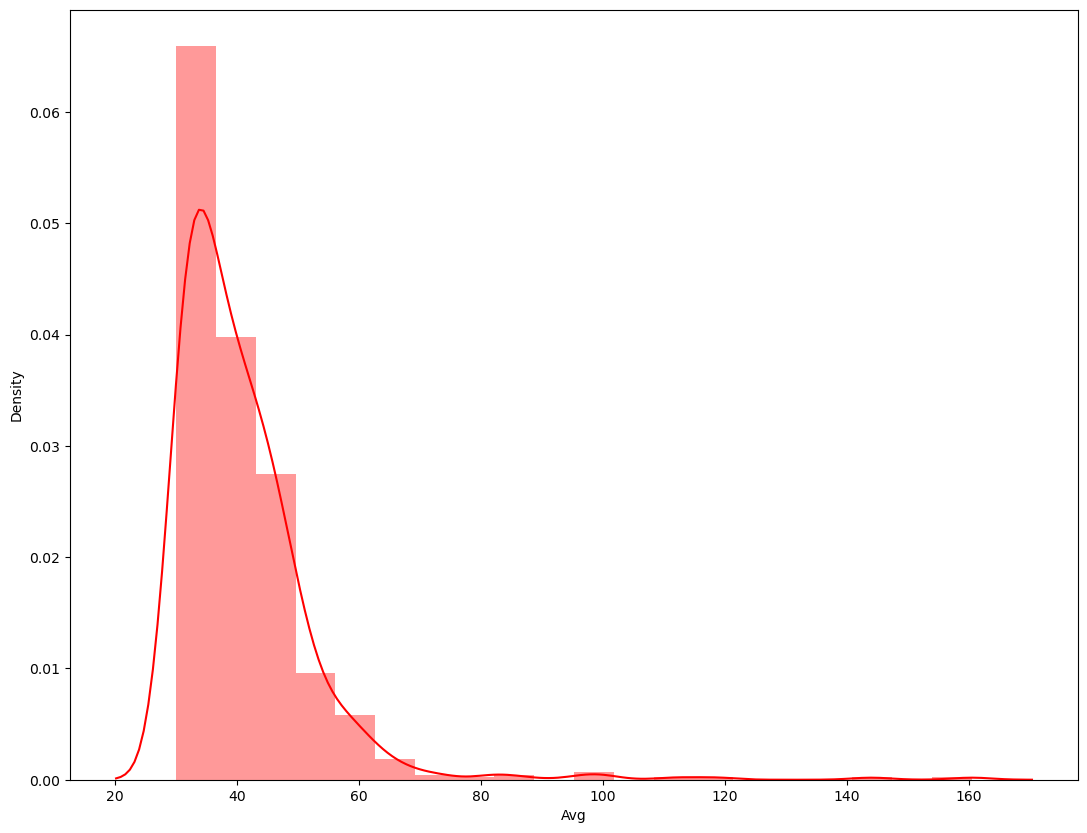

In [33]:
plt.rcParams['figure.figsize']=(13,10)
sns.distplot(data1.Avg,color='red',bins=20)

Observation:
- In my dataset 6% of Players average is distributed between 25 to 40 
- After 4% of Players average is distributed between 40 to 45
- After 2.8% of Players average is distributed between 45 to 50
- After 1% of Players average is distributed between 50 to nearly 55
- After 0.8% of Players average is distributed between 57 to 65
- 


# Sort the values by hundred in base of each country

In [34]:
ind=data1.loc[data1.Player.str.contains("INDIA")].sort_values(by="Hundred",ascending=False)

In [35]:
ind

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0
11,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122,236*,51.12,34,45,12.0
45,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202,254*,54.97,27,22,10.0
22,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586,319,49.34,23,32,16.0
...,...,...,...,...,...,...,...,...,...,...,...
594,BS Sandhu (INDIA),1983-1983,8,11.0,4.0,214,71,30.57,0,2,1.0
595,DJ Gandhi (INDIA),1999-1999,4,7.0,1.0,204,88,34.00,0,2,2.0
612,C Ramaswami (INDIA),1936-1936,2,4.0,1.0,170,60,56.66,0,1,0.0
649,Yuvraj of Patiala (INDIA),1934-1934,1,2.0,0.0,84,60,42.00,0,1,0.0


In [36]:
ind.reset_index(drop=True,inplace=True)
ind.index = range(1, len(ind) + 1)

In [37]:
ind

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0
2,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0
3,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122,236*,51.12,34,45,12.0
4,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202,254*,54.97,27,22,10.0
5,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586,319,49.34,23,32,16.0
...,...,...,...,...,...,...,...,...,...,...,...
70,BS Sandhu (INDIA),1983-1983,8,11.0,4.0,214,71,30.57,0,2,1.0
71,DJ Gandhi (INDIA),1999-1999,4,7.0,1.0,204,88,34.00,0,2,2.0
72,C Ramaswami (INDIA),1936-1936,2,4.0,1.0,170,60,56.66,0,1,0.0
73,Yuvraj of Patiala (INDIA),1934-1934,1,2.0,0.0,84,60,42.00,0,1,0.0


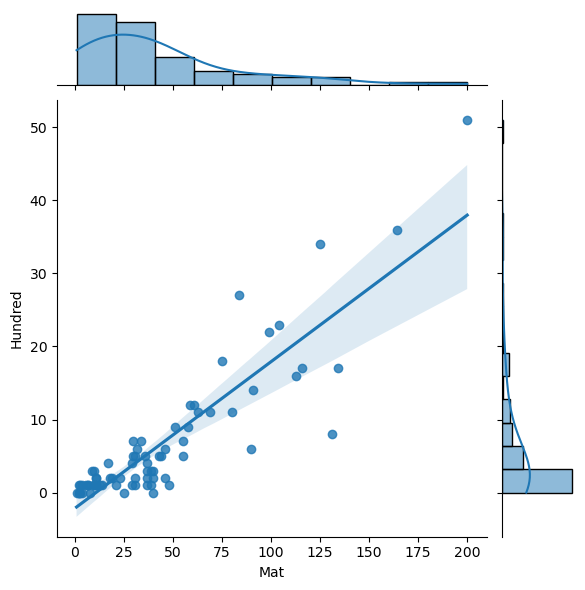

In [38]:
sns.jointplot(data=ind,x='Mat',y='Hundred',kind='reg')

Observation:

- In my dataset most number of indian players are played under 75 matches
- Which indian players are played below 60 matches they score below 10 hundreds or 10 hundreds
- which indian players are played between 60 to 100 matches they score 10 to 25 hundreds
- which indian players are played above 125 matches they score 30  hundreds
- Regression Line is mention that If Match are increse Hundreds are also continously increse

In [39]:
eng=data1.loc[data1.Player.str.contains("ENG")].sort_values(by="Hundred",ascending=False)

In [40]:
eng

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0
26,KP Pietersen (ENG),2005-2014,104,181.0,8.0,8181,227,47.28,23,35,10.0
33,MC Cowdrey (ENG),1954-1975,114,188.0,15.0,7624,182,44.06,22,38,9.0
27,G Boycott (ENG),1964-1982,108,193.0,23.0,8114,246*,47.72,22,42,10.0
42,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249,336*,58.45,22,24,4.0
...,...,...,...,...,...,...,...,...,...,...,...
537,Lord Tennyson (ENG),1913-1921,9,12.0,1.0,345,74*,31.36,0,4,1.0
531,MJ Stewart (ENG),1962-1964,8,12.0,1.0,385,87,35.00,0,2,1.0
530,CL Smith (ENG),1983-1986,8,14.0,1.0,392,91,30.15,0,2,1.0
504,JB Bolus (ENG),1963-1964,7,12.0,0.0,496,88,41.33,0,4,0.0


In [41]:
eng.reset_index(drop=True,inplace=True)
eng.index = range(1, len(eng) + 1)

In [42]:
eng

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0
2,KP Pietersen (ENG),2005-2014,104,181.0,8.0,8181,227,47.28,23,35,10.0
3,MC Cowdrey (ENG),1954-1975,114,188.0,15.0,7624,182,44.06,22,38,9.0
4,G Boycott (ENG),1964-1982,108,193.0,23.0,8114,246*,47.72,22,42,10.0
5,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249,336*,58.45,22,24,4.0
...,...,...,...,...,...,...,...,...,...,...,...
144,Lord Tennyson (ENG),1913-1921,9,12.0,1.0,345,74*,31.36,0,4,1.0
145,MJ Stewart (ENG),1962-1964,8,12.0,1.0,385,87,35.00,0,2,1.0
146,CL Smith (ENG),1983-1986,8,14.0,1.0,392,91,30.15,0,2,1.0
147,JB Bolus (ENG),1963-1964,7,12.0,0.0,496,88,41.33,0,4,0.0


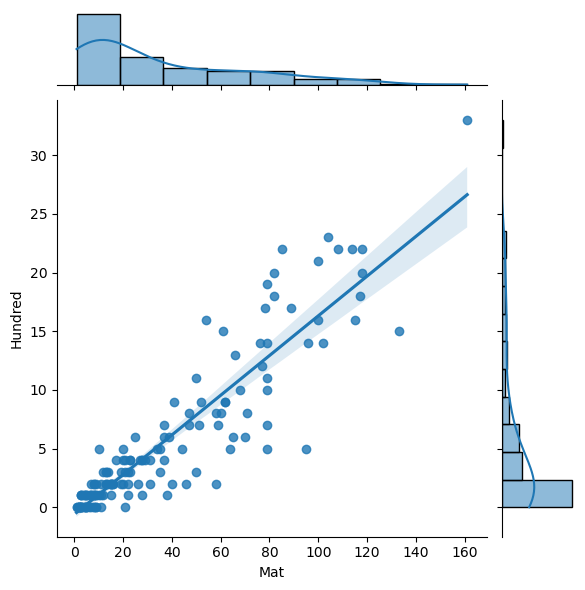

In [43]:
plt.rcParams['figure.figsize']=(5,5)
sns.jointplot(data=eng,x='Mat',y='Hundred',kind='reg')

Observation:
- In my dataset most number of england players are played under 80 matches
- Which england players are played below 60 matches they score below 10 hundreds or 10 hundreds
- which england players are played between 60 to 100 matches they score 10 to 25 hundreds
- which england players are played above 125 matches they score 25 hundreds
- Regression Line is mention that If Match are increse Hundreds are also continously increse

In [44]:
SA=data1.loc[data1.Player.str.contains("SA")].sort_values(by="Hundred",ascending=False)

In [45]:
SA.reset_index(drop=True,inplace=True)
SA.index = range(1, len(SA) + 1)

In [46]:
SA

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0
2,HM Amla (SA),2004-2019,124,215.0,16.0,9282,311*,46.64,28,41,13.0
3,GC Smith (ICC/SA),2002-2014,117,205.0,13.0,9265,277,48.25,27,38,11.0
4,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765,278*,50.66,22,46,8.0
5,G Kirsten (SA),1993-2004,101,176.0,15.0,7289,275,45.27,21,34,13.0
...,...,...,...,...,...,...,...,...,...,...,...
60,CM Francois (SA),1922-1923,5,9.0,1.0,252,72,31.50,0,1,0.0
61,MJ Susskind (SA),1924-1924,5,8.0,0.0,268,65,33.50,0,4,0.0
62,A Bacher (SA),1965-1970,12,22.0,1.0,679,73,32.33,0,6,1.0
63,HB Cameron (SA),1927-1935,26,45.0,4.0,1239,90,30.21,0,10,3.0


In [47]:
NZ=data1.loc[data1.Player.str.contains("NZ")].sort_values(by="Hundred",ascending=False)

In [48]:
NZ.reset_index(drop=True,inplace=True)
NZ.index = range(1, len(NZ) + 1)

In [49]:
NZ

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,KS Williamson (NZ),2010-2019,78,137.0,13.0,6379,242*,51.44,21,31,9.0
2,LRPL Taylor (NZ),2007-2019,98,173.0,20.0,7130,290,46.60,19,33,14.0
3,MD Crowe (NZ),1982-1995,77,131.0,11.0,5444,299,45.36,17,18,9.0
4,BB McCullum (NZ),2004-2016,101,176.0,9.0,6453,302,38.64,12,31,14.0
5,JG Wright (NZ),1978-1993,82,148.0,7.0,5334,185,37.82,12,23,7.0
6,NJ Astle (NZ),1996-2006,81,137.0,10.0,4702,222,37.02,11,24,11.0
7,TWM Latham (NZ),2014-2019,49,86.0,3.0,3554,264*,42.81,11,16,8.0
8,SP Fleming (NZ),1994-2008,111,189.0,10.0,7172,274*,40.06,9,46,16.0
9,BJ Watling (NZ),2009-2019,67,106.0,15.0,3616,205,39.73,8,18,9.0
10,GM Turner (NZ),1969-1983,41,73.0,6.0,2991,259,44.64,7,14,1.0


In [50]:
WI=data1.loc[data1.Player.str.contains("WI")].sort_values(by='Hundred',ascending=False)

In [51]:
WI

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
6,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953,400*,52.88,34,48,17.0
7,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867,203*,51.37,30,66,15.0
28,GS Sobers (WI),1954-1974,93,160.0,21.0,8032,365*,57.78,26,30,12.0
23,IVA Richards (WI),1974-1991,121,182.0,12.0,8540,291,50.23,24,45,10.0
34,CG Greenidge (WI),1974-1991,108,185.0,16.0,7558,226,44.72,19,34,11.0
...,...,...,...,...,...,...,...,...,...,...,...
635,AB Fudadin (WI),2012-2012,3,5.0,1.0,122,55,30.50,0,1,0.0
445,JDC Goddard (WI),1948-1957,27,39.0,11.0,859,83*,30.67,0,4,5.0
639,KR Rickards (WI),1948-1952,2,3.0,0.0,104,67,34.66,0,1,0.0
644,VH Stollmeyer (WI),1939-1939,1,1.0,0.0,96,96,96.00,0,1,0.0


In [52]:
WI.reset_index(drop=True,inplace=True)
WI.index = range(1, len(WI) + 1)

In [53]:
WI

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953,400*,52.88,34,48,17.0
2,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867,203*,51.37,30,66,15.0
3,GS Sobers (WI),1954-1974,93,160.0,21.0,8032,365*,57.78,26,30,12.0
4,IVA Richards (WI),1974-1991,121,182.0,12.0,8540,291,50.23,24,45,10.0
5,CG Greenidge (WI),1974-1991,108,185.0,16.0,7558,226,44.72,19,34,11.0
...,...,...,...,...,...,...,...,...,...,...,...
73,AB Fudadin (WI),2012-2012,3,5.0,1.0,122,55,30.50,0,1,0.0
74,JDC Goddard (WI),1948-1957,27,39.0,11.0,859,83*,30.67,0,4,5.0
75,KR Rickards (WI),1948-1952,2,3.0,0.0,104,67,34.66,0,1,0.0
76,VH Stollmeyer (WI),1939-1939,1,1.0,0.0,96,96,96.00,0,1,0.0


In [54]:
data1.loc[data1.Player.str.contains('AUS')].sort_values(by='Hundred',ascending=False)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0
10,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927,200,51.06,32,50,22.0
21,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0
52,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,29,13,7.0
20,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643,329*,49.10,28,27,9.0
...,...,...,...,...,...,...,...,...,...,...,...
335,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507,89,33.48,0,13,6.0
450,TR Veivers (AUS),1963-1967,21,30.0,4.0,813,88,31.26,0,7,3.0
357,BM Laird (AUS),1979-1982,21,40.0,2.0,1341,92,35.28,0,11,2.0
525,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410,65,51.25,0,4,0.0


In [55]:
AUS=data1.loc[data1.Player.str.contains("AUS")].sort_values(by='Hundred',ascending=False)

In [56]:
AUS.reset_index(drop=True,inplace=True)
AUS.index = range(1, len(AUS) + 1)

In [57]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927,200,51.06,32,50,22.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,29,13,7.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643,329*,49.10,28,27,9.0
...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507,89,33.48,0,13,6.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813,88,31.26,0,7,3.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341,92,35.28,0,11,2.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410,65,51.25,0,4,0.0


Observation:which Player are most hundred in each country

1.India->Sachin Ramesh Tendulkar

2.SouthAfrica-> JH Kallis

3.England-> AN cook

4.Newzeland-> Kane williamson

5.Australia->Ricky Ponting

6.West Indies-> Brain Lara

# Only consider as Hundred and Fifty to calculate the runs

In [58]:
AUS["Total as H and F"]=(AUS['Hundred']*100)+(AUS["Fifty"]*50)
AUS["Inn as H & F"]=(AUS["Inn"])-(AUS['Zero'])

In [59]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927,200,51.06,32,50,22.0,5700,238.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0,4450,170.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,29,13,7.0,3550,73.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643,329*,49.10,28,27,9.0,4150,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507,89,33.48,0,13,6.0,650,46.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813,88,31.26,0,7,3.0,350,27.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341,92,35.28,0,11,2.0,550,38.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410,65,51.25,0,4,0.0,200,12.0


In [60]:
AUS

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0
2,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927,200,51.06,32,50,22.0,5700,238.0
3,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0,4450,170.0
4,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,29,13,7.0,3550,73.0
5,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643,329*,49.10,28,27,9.0,4150,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507,89,33.48,0,13,6.0,650,46.0
114,TR Veivers (AUS),1963-1967,21,30.0,4.0,813,88,31.26,0,7,3.0,350,27.0
115,BM Laird (AUS),1979-1982,21,40.0,2.0,1341,92,35.28,0,11,2.0,550,38.0
116,AG Fairfax (AUS),1929-1931,10,12.0,4.0,410,65,51.25,0,4,0.0,200,12.0


In [61]:
data1["Total as H and F"]=(data1['Hundred']*100)+(data1["Fifty"]*50)
data1["Inn as H & F"]=(data1["Inn"])-(data1['Zero'])

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\1514934507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Total as H and F"]=(data1['Hundred']*100)+(data1["Fifty"]*50)
C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\1514934507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Inn as H & F"]=(data1["Inn"])-(data1['Zero'])


In [62]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0,8500,315.0
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0,7400,264.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0,6750,278.0
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0,6150,282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71,60*,35.50,0,1,0.0,50,3.0
654,JH King (ENG),1909-1909,1,2.0,0.0,64,60,32.00,0,1,0.0,50,2.0
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60,58,30.00,0,1,0.0,50,2.0
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58,58,58.00,0,1,0.0,50,1.0


# Sort the average by Highest to lowest at the same time which players are match played between 31 to 60 matches

In [63]:
avg6=data1.loc[((data1.Mat>30)&(data1.Mat<=60))].sort_values(by='Avg',ascending=False)

In [64]:
avg6.reset_index(drop=True,inplace=True)
avg6.index = range(1, len(avg6) + 1)
avg6

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,DG Bradman (AUS),1928-1948,52,80.0,10.0,6996,334,99.94,29,13,7.0,3550,73.0
2,H Sutcliffe (ENG),1924-1935,54,84.0,9.0,4555,194,60.73,16,23,2.0,2750,82.0
3,ED Weekes (WI),1948-1958,48,81.0,5.0,4455,207,58.61,15,19,6.0,2450,75.0
4,CL Walcott (WI),1948-1960,44,74.0,7.0,3798,220,56.68,15,14,1.0,2200,73.0
5,AD Nourse (SA),1935-1951,34,62.0,7.0,2960,231,53.81,9,14,3.0,1600,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,W Rhodes (ENG),1899-1930,58,98.0,21.0,2325,179,30.19,2,11,6.0,750,92.0
164,HH Dippenaar (SA),1999-2007,38,62.0,5.0,1718,177*,30.14,3,7,8.0,650,54.0
165,SO Dowrich (WI),2015-2019,31,56.0,8.0,1444,125*,30.08,3,8,6.0,700,50.0
166,AD Gaekwad (INDIA),1974-1985,40,70.0,4.0,1985,201,30.07,2,10,4.0,700,66.0


# which players are match played between 61 to 100 matches also sorting the highest to low average

In [65]:
avg100=data1.loc[((data1.Mat>60)&(data1.Mat<=100))].sort_values(by='Avg',ascending=False)

In [66]:
avg100.reset_index(drop=True,inplace=True)
avg100.index = range(1, len(avg100) + 1)
avg100

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,SPD Smith (AUS),2010-2019,72,130.0,16.0,7164,239,62.84,26,28,4.0,4000,126.0
2,KF Barrington (ENG),1955-1968,82,131.0,15.0,6806,256,58.67,20,35,5.0,3750,126.0
3,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249,336*,58.45,22,24,4.0,3400,136.0
4,GS Sobers (WI),1954-1974,93,160.0,21.0,8032,365*,57.78,26,30,12.0,4100,148.0
5,JB Hobbs (ENG),1908-1930,61,102.0,7.0,5410,211,56.94,15,28,4.0,2900,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,MN Samuels (WI),2000-2016,71,127.0,7.0,3917,260,32.64,7,24,14.0,1900,113.0
85,BE Congdon (NZ),1965-1978,61,114.0,7.0,3448,176,32.22,7,19,9.0,1650,105.0
86,PJL Dujon (WI),1981-1991,81,115.0,11.0,3322,139,31.94,5,16,8.0,1300,107.0
87,A Flintoff (ENG/ICC),1998-2009,79,130.0,9.0,3845,167,31.77,5,26,17.0,1800,113.0


# which players are match played between 101 to 150 matches also sorting the highest to low average

In [67]:
avg150=data1.loc[(data1.Mat>100)&(data1.Mat<=150)].sort_values(by='Avg',ascending=False)

In [68]:
avg150.reset_index(drop=True)
avg150.index = range(1, len(avg150) + 1)
avg150

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,KC Sangakkara (SL),2000-2015,134,233.0,17.0,12400,319,57.40,38,52,11.0,6400,222.0
2,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953,400*,52.88,34,48,17.0,5800,215.0
3,Javed Miandad (PAK),1976-1993,124,189.0,21.0,8832,280*,52.57,23,43,6.0,4450,183.0
4,Younis Khan (PAK),2000-2017,118,213.0,19.0,10099,313,52.05,34,33,19.0,5050,194.0
5,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122,236*,51.12,34,45,12.0,5650,202.0
6,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0,4450,170.0
7,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765,278*,50.66,22,46,8.0,4500,183.0
8,IVA Richards (WI),1974-1991,121,182.0,12.0,8540,291,50.23,24,45,10.0,4650,172.0
9,DPMD Jayawardene (SL),1997-2014,149,252.0,15.0,11814,374,49.84,34,50,15.0,5900,237.0
10,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200.0,22.0,8830,329,49.60,25,46,15.0,4800,185.0


# which players are match played above 150 matches also sorting the highest to low average

In [69]:
avg200=data1.loc[data1.Mat>150].sort_values(by='Avg',ascending=False)

In [70]:
avg200.reset_index(drop=True,inplace=True)
avg200.index = range(1, len(avg200) + 1)
avg200

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F
1,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0,7400,264.0
2,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0,8500,315.0
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0,6750,278.0
4,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0
5,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867,203*,51.37,30,66,15.0,6300,265.0
6,SR Waugh (AUS),1985-2004,168,260.0,46.0,10927,200,51.06,32,50,22.0,5700,238.0
7,AR Border (AUS),1978-1994,156,265.0,44.0,11174,205,50.56,27,63,11.0,5850,254.0
8,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0,6150,282.0


In [71]:
new_col=[]
for data in data1.Avg:
    if data<=50:
        new="Good"
        new_col.append(new)
    elif data>50 :
        da='Perfect'
        new_col.append(da)
data1['Avg level']=new_col

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\2311721558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Avg level']=new_col


# Above Fifty 50's

In [72]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0,8500,315.0,Perfect
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0,Perfect
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0,7400,264.0,Perfect
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0,6750,278.0,Perfect
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0,6150,282.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71,60*,35.50,0,1,0.0,50,3.0,Good
654,JH King (ENG),1909-1909,1,2.0,0.0,64,60,32.00,0,1,0.0,50,2.0,Good
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60,58,30.00,0,1,0.0,50,2.0,Good
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58,58,58.00,0,1,0.0,50,1.0,Perfect


In [73]:
fifty=data1[data1.Fifty>50]

In [74]:
fifty.reset_index(drop=True,inplace=True)

In [75]:
fifty

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0,8500,315.0,Perfect
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0,Perfect
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0,7400,264.0,Perfect
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0,6750,278.0,Perfect
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0,6150,282.0,Good
5,KC Sangakkara (SL),2000-2015,134,233.0,17.0,12400,319,57.40,38,52,11.0,6400,222.0,Perfect
6,S Chanderpaul (WI),1994-2015,164,280.0,49.0,11867,203*,51.37,30,66,15.0,6300,265.0,Perfect
7,AR Border (AUS),1978-1994,156,265.0,44.0,11174,205,50.56,27,63,11.0,5850,254.0,Perfect
8,VVS Laxman (INDIA),1996-2012,134,225.0,34.0,8781,281,45.97,17,56,14.0,4500,211.0,Good


<BarContainer object of 9 artists>

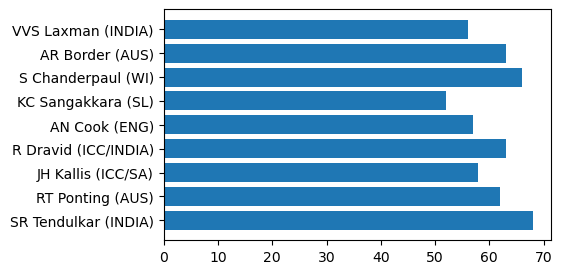

In [76]:
plt.rcParams['figure.figsize']=(5,3)
plt.barh(fifty['Player'],fifty['Fifty'],align='center')

<Axes: xlabel='Player', ylabel='Fifty'>

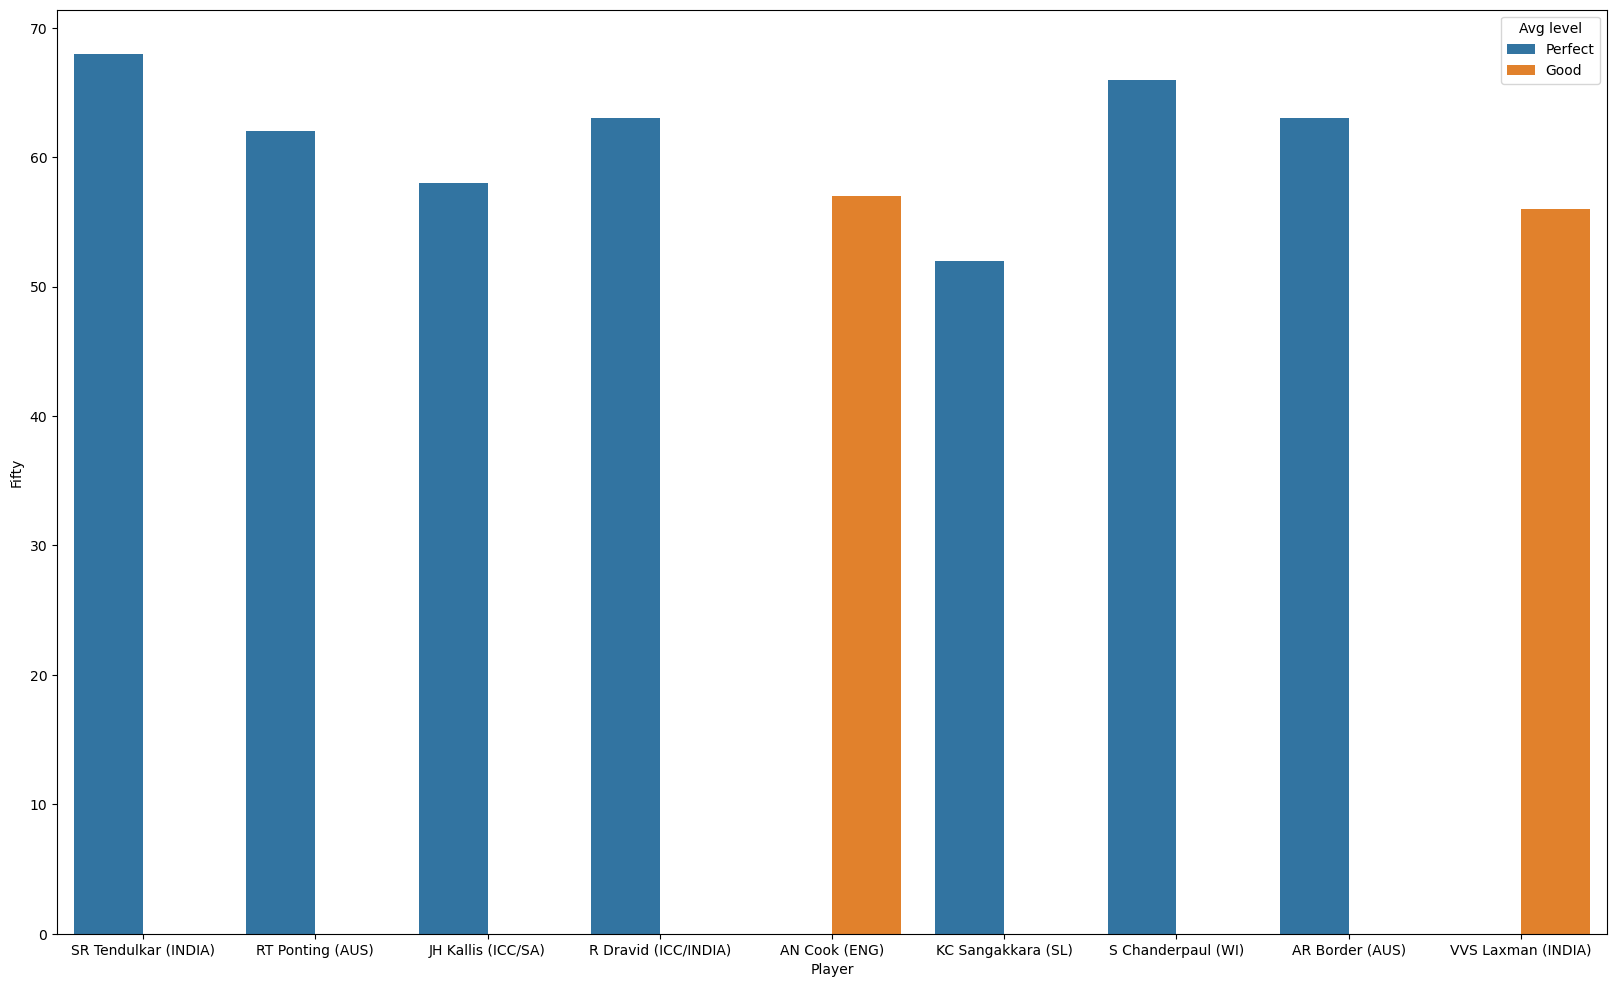

In [77]:
plt.rcParams['figure.figsize']=(20,12)
sns.barplot(x='Player',y='Fifty',data=fifty,hue='Avg level')

# Between 30 to 50 fifty's

In [78]:
range3050=data1.loc[(data1.Fifty<50) & (data1.Fifty>=30)]
range3050.reset_index(drop=True,inplace=True)

In [79]:
range3050

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,BC Lara (ICC/WI),1990-2006,131,232.0,6.0,11953,400*,52.88,34,48,17.0,5800,215.0,Perfect
1,SM Gavaskar (INDIA),1971-1987,125,214.0,16.0,10122,236*,51.12,34,45,12.0,5650,202.0,Perfect
2,Younis Khan (PAK),2000-2017,118,213.0,19.0,10099,313,52.05,34,33,19.0,5050,194.0,Perfect
3,HM Amla (SA),2004-2019,124,215.0,16.0,9282,311*,46.64,28,41,13.0,4850,202.0,Good
4,GC Smith (ICC/SA),2002-2014,117,205.0,13.0,9265,277,48.25,27,38,11.0,4600,194.0,Good
5,GA Gooch (ENG),1975-1995,118,215.0,6.0,8900,333,42.58,20,46,13.0,4300,202.0,Good
6,Javed Miandad (PAK),1976-1993,124,189.0,21.0,8832,280*,52.57,23,43,6.0,4450,183.0,Perfect
7,Inzamam-ul-Haq (ICC/PAK),1992-2007,120,200.0,22.0,8830,329,49.60,25,46,15.0,4800,185.0,Good
8,AB de Villiers (SA),2004-2018,114,191.0,18.0,8765,278*,50.66,22,46,8.0,4500,183.0,Perfect
9,V Sehwag (ICC/INDIA),2001-2013,104,180.0,6.0,8586,319,49.34,23,32,16.0,3900,164.0,Good


In [80]:
b=[]
for i in range3050['Player']:
    a=i.split()
    b.append(a[1])

In [81]:
range3050['Player']=b

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\1371978229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range3050['Player']=b


<Axes: xlabel='Player', ylabel='Fifty'>

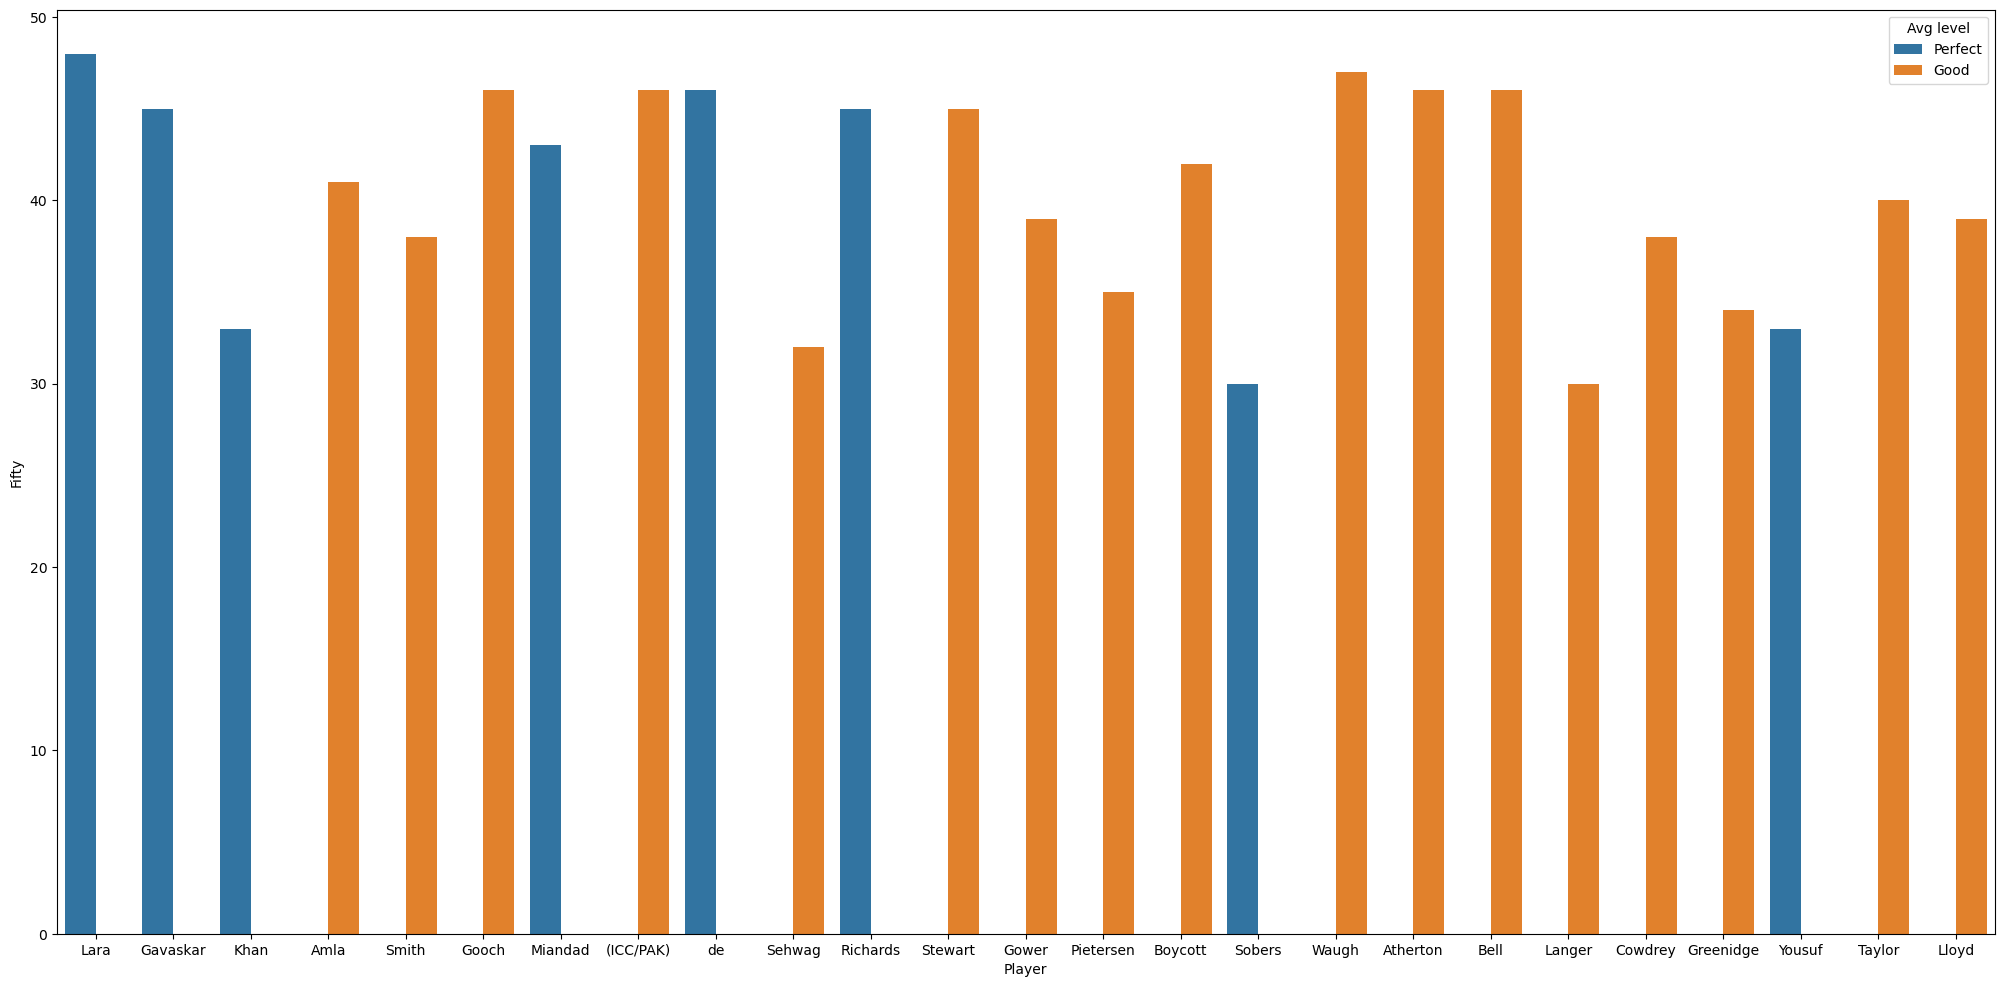

In [82]:
plt.rcParams['figure.figsize']=(25,12)
sns.barplot(x='Player',y='Fifty',data=range3050.head(25),hue='Avg level')

In [83]:
range3050

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,Lara,1990-2006,131,232.0,6.0,11953,400*,52.88,34,48,17.0,5800,215.0,Perfect
1,Gavaskar,1971-1987,125,214.0,16.0,10122,236*,51.12,34,45,12.0,5650,202.0,Perfect
2,Khan,2000-2017,118,213.0,19.0,10099,313,52.05,34,33,19.0,5050,194.0,Perfect
3,Amla,2004-2019,124,215.0,16.0,9282,311*,46.64,28,41,13.0,4850,202.0,Good
4,Smith,2002-2014,117,205.0,13.0,9265,277,48.25,27,38,11.0,4600,194.0,Good
5,Gooch,1975-1995,118,215.0,6.0,8900,333,42.58,20,46,13.0,4300,202.0,Good
6,Miandad,1976-1993,124,189.0,21.0,8832,280*,52.57,23,43,6.0,4450,183.0,Perfect
7,(ICC/PAK),1992-2007,120,200.0,22.0,8830,329,49.60,25,46,15.0,4800,185.0,Good
8,de,2004-2018,114,191.0,18.0,8765,278*,50.66,22,46,8.0,4500,183.0,Perfect
9,Sehwag,2001-2013,104,180.0,6.0,8586,319,49.34,23,32,16.0,3900,164.0,Good


# Below thirty 50's

In [84]:
below30=data1.loc[(data1.Fifty<30.0) & (data1.Fifty>10.0)]
below30.reset_index(drop=True,inplace=True)

In [85]:
below30

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,MJ Clarke (AUS),2004-2015,115,198.0,22.0,8643,329*,49.10,28,27,9.0,4150,189.0,Good
1,ML Hayden (AUS),1994-2009,103,184.0,14.0,8625,380,50.73,30,29,14.0,4450,170.0,Perfect
2,WR Hammond (ENG),1927-1947,85,140.0,16.0,7249,336*,58.45,22,24,4.0,3400,136.0,Perfect
3,V Kohli (INDIA),2011-2019,84,141.0,10.0,7202,254*,54.97,27,22,10.0,3800,131.0,Perfect
4,SPD Smith (AUS),2010-2019,72,130.0,16.0,7164,239,62.84,26,28,4.0,4000,126.0,Perfect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,NJ Contractor (INDIA),1955-1962,31,52.0,1.0,1611,108,31.58,1,11,2.0,650,50.0,Good
199,RH Catterall (SA),1922-1931,24,43.0,2.0,1555,120,37.92,3,11,3.0,850,40.0,Good
200,T Taibu (ZIM),2001-2012,28,54.0,3.0,1546,153,30.31,1,12,5.0,700,49.0,Good
201,KD Mackay (AUS),1956-1963,37,52.0,7.0,1507,89,33.48,0,13,6.0,650,46.0,Good


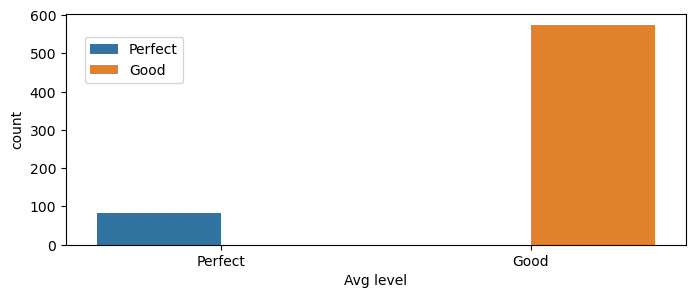

In [86]:
plt.rcParams['figure.figsize']=(8,3)
sns.countplot(x="Avg level",data=data1,hue='Avg level')
plt.legend(loc=(0.03,0.7))

C:\Users\gnane\AppData\Local\Temp\ipykernel_16780\3759370572.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True)


<Axes: >

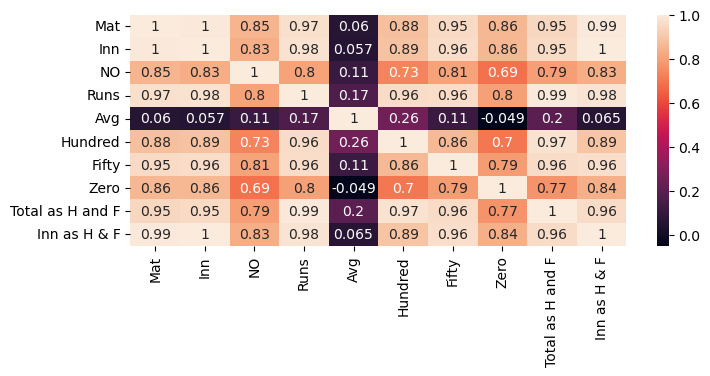

In [87]:
sns.heatmap(data1.corr(),annot=True)

<Axes: >

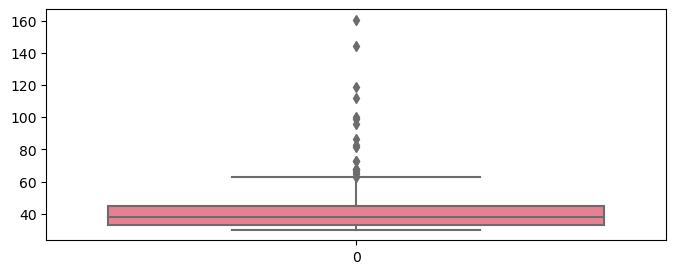

In [90]:
plt.rcParams['figure.figsize']=(8,3)
sns.boxplot(data1['Avg'],palette='husl',color='blue')

Understand of boxplot:

maximum avaerage is approximately 65 (It means this players are number of played matches is above 50)

which players of average is Above 65 and this players are played matches is 50 or below 50 matches

so if played matches are increase average is decrease


<Axes: xlabel='Avg', ylabel='Avg level'>

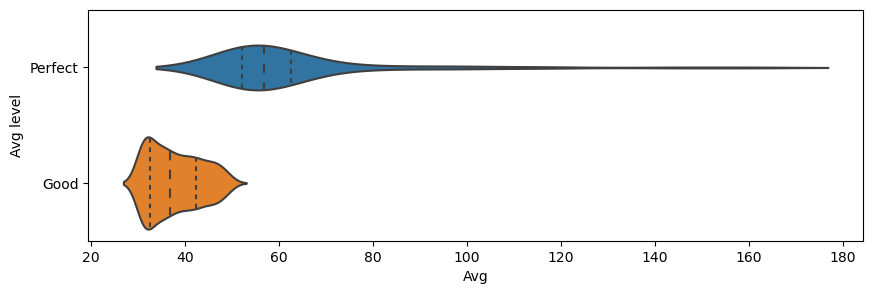

In [95]:
sns.violinplot(x=data1.Avg,y=data1['Avg level'],inner='quartiles')

# Decision Tree

In [501]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Regression => Target is runs

In [999]:
x=data1.iloc[:,[3,8,9]]
y=data1.iloc[:,5]

In [1000]:
x

,Inn,Hundred,Fifty
0,329.0,51,68
1,287.0,41,62
2,280.0,45,58
3,286.0,36,63
4,291.0,33,57
...,...,...,...
653,3.0,0,1
654,2.0,0,1
655,2.0,0,1
656,1.0,0,1


In [1001]:
y

0      15921
1      13378
2      13289
3      13288
4      12472
       ...  
653       71
654       64
655       60
656       58
657       51
Name: Runs, Length: 658, dtype: int32

In [1002]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=55)

In [1003]:
pd.DataFrame(x_train)

,Inn,Hundred,Fifty
402,27.0,2,7
568,8.0,1,1
195,77.0,8,14
634,4.0,0,1
649,2.0,0,1
...,...,...,...
347,54.0,4,5
37,175.0,19,39
541,10.0,2,0
295,69.0,1,14


In [1004]:
pd.DataFrame(y_train)

,Runs
402,1081
568,252
195,2887
634,125
649,84
...,...
347,1418
37,7515
541,329
295,1844


In [1005]:
pd.DataFrame(x_test)

,Inn,Hundred,Fifty
356,48.0,3,4
552,9.0,0,2
401,21.0,4,3
255,56.0,4,12
189,73.0,7,14
...,...,...,...
583,8.0,0,2
569,4.0,1,1
13,215.0,28,41
108,122.0,12,26


In [1006]:
pd.DataFrame(y_test)

,Runs
356,1341
552,281
401,1084
255,2159
189,2991
...,...
583,229
569,251
13,9282
108,4528


In [1007]:
clas=DecisionTreeClassifier()
reg=DecisionTreeRegressor()

In [1008]:
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [1009]:
prd=reg.predict(x_test)
pd.DataFrame(prd)

,0
0,1238.0
1,298.0
2,894.0
3,1755.0
4,2705.0
...,...
193,266.6
194,237.0
195,10122.0
196,5234.0


In [1010]:
pd.DataFrame(prd)

,0
0,1238.0
1,298.0
2,894.0
3,1755.0
4,2705.0
...,...
193,266.6
194,237.0
195,10122.0
196,5234.0


In [1011]:
from sklearn import metrics
DecisionTree=metrics.r2_score(y_test,prd)

In [1012]:
DecisionTree

0.9744867321594025

Classification => Target is Avg level

In [923]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]

In [924]:
y

0      Perfect
1      Perfect
2      Perfect
3      Perfect
4         Good
        ...   
653       Good
654       Good
655       Good
656    Perfect
657    Perfect
Name: Avg level, Length: 658, dtype: object

In [925]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [926]:
clas.fit(x_train,y_train)

DecisionTreeClassifier()

In [927]:
prd1=clas.predict(x_test)

In [928]:
(prd1)

array(['Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect',
       'Perfect', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Perfect', 'Good', 'Good', 'Good',
       'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Perfect',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', '

In [929]:
DecisionTreeC=metrics.accuracy_score(y_test,prd1)

In [930]:
DecisionTreeC

0.8560606060606061

# Logistic regression

Classification => Target is Average Level

In [967]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]
x

,Mat,Runs,Hundred,Fifty
0,200,15921,51,68
1,168,13378,41,62
2,166,13289,45,58
3,164,13288,36,63
4,161,12472,33,57
...,...,...,...,...
653,2,71,0,1
654,1,64,0,1
655,2,60,0,1
656,1,58,0,1


In [968]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [969]:
l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=67)

In [970]:
model=LogisticRegression()
model.fit(l_train,r_train)

LogisticRegression()

In [971]:
prd=model.predict(l_test)

In [972]:
prd

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good

In [973]:
cm=confusion_matrix(r_test,prd)

In [974]:
cm

array([[118,   0],
       [ 11,   3]], dtype=int64)

In [975]:
Logistic_Regression=accuracy_score(r_test,prd)

In [976]:
Logistic_Regression

0.9166666666666666

# Random Forest

RandomForest classifier => Target is average Level

In [579]:
from sklearn.ensemble import RandomForestClassifier

In [590]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]

In [591]:
r_train,r_test,f_train,f_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [592]:
rnd=RandomForestClassifier(n_estimators=50)

In [593]:
rnd.fit(r_train,f_train)

RandomForestClassifier(n_estimators=50)

In [594]:
prd1=rnd.predict(r_test)

In [595]:
prd1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'

In [596]:
cm=confusion_matrix(f_test,prd1)

In [597]:
cm

array([[168,   6],
       [ 15,   9]], dtype=int64)

In [598]:
Random_Forest=accuracy_score(f_test,prd1)

In [599]:
Random_Forest

0.8939393939393939

RandomForest Regressor => Target is Runs

In [601]:
from sklearn.ensemble import RandomForestRegressor

In [1013]:
r=data1.iloc[:,[3,8,9]]
s=data1.iloc[:,5]
r=np.asarray(r)
s=np.asarray(s)

In [1014]:
r_train,r_test,s_train,s_test=train_test_split(r,s,test_size=0.2,random_state=55)

In [1015]:
rd=RandomForestRegressor()

In [1016]:
rd.fit(r_train,s_train)

RandomForestRegressor()

In [1017]:
prdr=rd.predict(r_test)
prdr

array([ 1404.08      ,   258.95807071,   857.7       ,  1832.56      ,
        2772.16      ,  1011.48      ,  1921.79      ,  1316.93      ,
         505.795     ,  1277.36      ,  2122.32      ,  1448.94      ,
        1311.74      ,  6206.89      ,  2847.64      ,   796.09      ,
        1692.72      ,  1001.27      ,  6895.4       , 11867.08      ,
        3779.59      ,  3285.4       ,   232.80205556,  1351.54333333,
         466.435     ,  2785.44      ,   469.98666667,  1043.8       ,
        6607.9       ,   423.78      ,  2195.44      ,   661.53      ,
         163.2036486 ,  3737.52      ,   733.86133333,  1197.61016667,
       10571.33      ,   102.97615043,  1341.1305    ,  7966.89      ,
        1016.98      ,  1890.56      ,   942.26      ,  2742.1       ,
        2613.59      ,  3910.92      ,   492.735     ,  7516.16      ,
        2056.88      ,   469.98666667,   221.18860714,  1880.05      ,
         129.11643651,  1037.45      ,  3287.62      ,  7202.16      ,
      

In [1018]:
RandomForestR=metrics.r2_score(s_test,prdr)
RandomForestR

0.9841154468909104

# Linear Regression 

Regression => Target is Runs

In [984]:
from sklearn.linear_model import LinearRegression

In [1019]:
r=data1.iloc[:,[3,8,9]]
s=data1.iloc[:,5]
r=np.asarray(r)
s=np.asarray(s)

In [1020]:
r_train,r_test,s_train,s_test=train_test_split(r,s,test_size=0.2,random_state=55)

In [1021]:
ln=LinearRegression()

In [1022]:
ln.fit(r_train,s_train)

LinearRegression()

In [1023]:
lnprd=ln.predict(r_test)

In [1024]:
Ln=metrics.r2_score(lnprd,s_test)
Ln

0.9951061375751179

# Naive Bayes 

Classification => Target is Avg level

In [624]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

In [931]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]
x

,Mat,Runs,Hundred,Fifty
0,200,15921,51,68
1,168,13378,41,62
2,166,13289,45,58
3,164,13288,36,63
4,161,12472,33,57
...,...,...,...,...
653,2,71,0,1
654,1,64,0,1
655,2,60,0,1
656,1,58,0,1


In [932]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=43)

In [933]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [934]:
model=GaussianNB()

In [935]:
model.fit(xtrain,ytrain)

GaussianNB()

In [936]:
prd=model.predict(xtest)

In [937]:
prd

array(['Good', 'Good', 'Perfect', 'Good', 'Good', 'Perfect', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Good', 'Perfect', 'Good',
       'Perfect', 'Good', 'Good', 'Perfect', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Perfect', 'Good', 'Perfect', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Perfect', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [938]:
Naive_Bayes=accuracy_score(ytest,prd)
Naive_Bayes

0.8737373737373737

In [939]:
c=classification_report(ytest,prd)

In [940]:
print("\n",c)


               precision    recall  f1-score   support

        Good       0.93      0.93      0.93       177
     Perfect       0.40      0.38      0.39        21

    accuracy                           0.87       198
   macro avg       0.66      0.66      0.66       198
weighted avg       0.87      0.87      0.87       198



# K-Nearest Neighbours

Classification => Target is Avg level

In [635]:
from sklearn.neighbors import KNeighborsClassifier

In [941]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]

In [942]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=30)


In [943]:
b_k=None
b_a=0

In [944]:
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xtrain,ytrain,cv=5)
    print(scores)
    m_a=np.mean(scores)
    print(m_a)
    if m_a>b_a:
        b_a=m_a
        b_k=k

[0.80434783 0.84782609 0.7826087  0.79347826 0.81521739]
0.808695652173913
[0.85869565 0.84782609 0.84782609 0.84782609 0.85869565]
0.8521739130434783
[0.85869565 0.84782609 0.79347826 0.83695652 0.83695652]
0.8347826086956521
[0.85869565 0.86956522 0.79347826 0.84782609 0.85869565]
0.8456521739130434
[0.84782609 0.85869565 0.79347826 0.84782609 0.84782609]
0.8391304347826086
[0.85869565 0.88043478 0.85869565 0.85869565 0.86956522]
0.8652173913043478
[0.84782609 0.86956522 0.82608696 0.85869565 0.86956522]
0.8543478260869566
[0.85869565 0.86956522 0.85869565 0.85869565 0.85869565]
0.8608695652173914
[0.84782609 0.86956522 0.82608696 0.85869565 0.86956522]
0.8543478260869566
[0.85869565 0.89130435 0.85869565 0.85869565 0.86956522]
0.8673913043478262
[0.85869565 0.86956522 0.81521739 0.85869565 0.86956522]
0.8543478260869565
[0.85869565 0.90217391 0.88043478 0.85869565 0.86956522]
0.8739130434782609
[0.85869565 0.90217391 0.88043478 0.85869565 0.86956522]
0.8739130434782609
[0.85869565 0

In [945]:
b_k

12

In [946]:
bknn=KNeighborsClassifier(n_neighbors=b_k)

In [947]:
bknn=bknn.fit(xtrain,ytrain)

In [948]:
knn=bknn.predict(xtest)

In [949]:
KNN=accuracy_score(knn,ytest)
KNN

0.9090909090909091

In [645]:
bknn.predict([[300,12000,40,50]])

C:\Users\gnane\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Perfect'], dtype=object)

# Ridge And Lasso Regression

Regresssor => Target is Runs

In [646]:
r=data1.iloc[:,[2,7,8,9]]
s=data1.iloc[:,5]

In [647]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,0.001,0.01,10,40,100,0.00001]}
ridre=GridSearchCV(ridge,params,cv=5)
ridre.fit(r,s)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 10, 40, 100,
                                   1e-05]})

In [648]:
print(ridre.best_params_)
print(ridre.best_score_)

{'alpha': 1e-15}
0.69734642229093


In [649]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-15,1e-10,0.001,0.01]}
lasso=GridSearchCV(lasso,params,cv=5)
lasso.fit(r,s)

C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.894e+06, tolerance: 6.210e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+07, tolerance: 4.253e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\gnane\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+07, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01]})

In [650]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 1e-15}
0.6973464222909322


# ANN(backward probagation)

Classification => Target is classification

In [950]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [951]:
x=data1.iloc[:,[2,5,8,9]]
y=data1.iloc[:,-1]

In [952]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)

In [953]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [954]:
nm=MLPClassifier(hidden_layer_sizes=(10,),max_iter=1100,random_state=59)

In [955]:
nm.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1100, random_state=59)

In [956]:
nm.score(x_test,y_test)

0.9242424242424242

In [957]:
train_ac=[]
check_ac=[]

In [958]:
for epoch in range(1,101):
    nm.fit(x_train,y_train)
    train_ac.append(nm.score(x_train,y_train))
    check_ac.append(nm.score(x_test,y_test))

In [959]:
ANN=nm.score(x_test,y_test)

In [960]:
ANN

0.9242424242424242

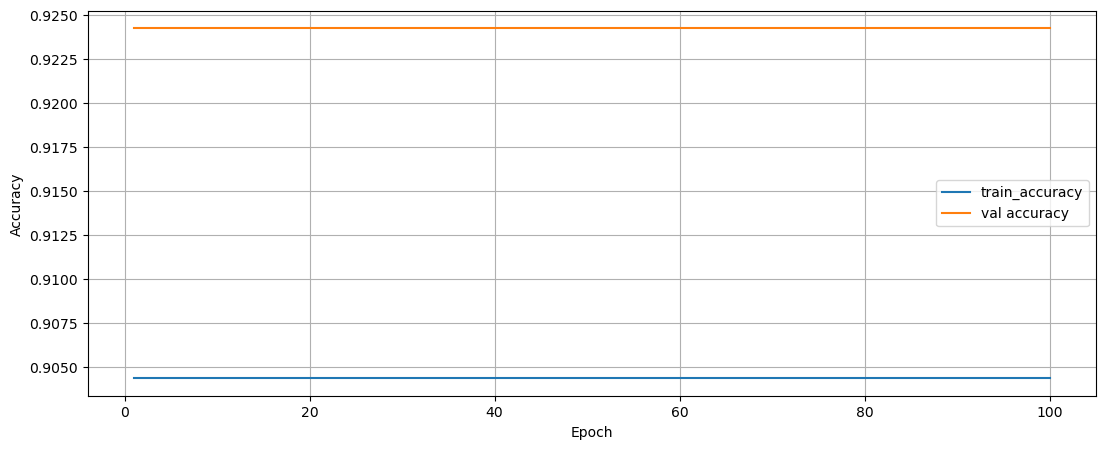

In [961]:
plt.plot(range(1,101),train_ac,label="train_accuracy")
plt.plot(range(1,101),check_ac,label="val accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Average  Prediction

Regression => Target is average

In [663]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [664]:
data1

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,Hundred,Fifty,Zero,Total as H and F,Inn as H & F,Avg level
0,SR Tendulkar (INDIA),1989-2013,200,329.0,33.0,15921,248*,53.78,51,68,14.0,8500,315.0,Perfect
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378,257,51.85,41,62,17.0,7200,270.0,Perfect
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289,224,55.37,45,58,16.0,7400,264.0,Perfect
3,R Dravid (ICC/INDIA),1996-2012,164,286.0,32.0,13288,270,52.31,36,63,8.0,6750,278.0,Perfect
4,AN Cook (ENG),2006-2018,161,291.0,16.0,12472,294,45.35,33,57,9.0,6150,282.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,P Roy (INDIA),1982-1982,2,3.0,1.0,71,60*,35.50,0,1,0.0,50,3.0,Good
654,JH King (ENG),1909-1909,1,2.0,0.0,64,60,32.00,0,1,0.0,50,2.0,Good
655,MJ Horton (ENG),1959-1959,2,2.0,0.0,60,58,30.00,0,1,0.0,50,2.0,Good
656,JA Morkel (SA),2009-2009,1,1.0,0.0,58,58,58.00,0,1,0.0,50,1.0,Perfect


In [776]:
x=data1.iloc[:,[3,4,5,10]]
y=data1.iloc[:,7]
x=np.asarray(x)
y=np.asarray(y)

In [777]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [778]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [779]:
rr_prd=model.predict(x_test)
rr_prd

array([36.38, 44.43, 30.14, 31.89, 47.  , 73.  , 37.  , 42.  , 32.28,
       30.55, 45.6 , 31.78, 39.63, 37.41, 43.65, 56.87, 40.61, 35.1 ,
       42.46, 46.36, 49.27, 43.86, 44.34, 40.5 , 51.25, 36.46, 47.  ,
       31.94, 47.4 , 31.89, 31.47, 31.47, 46.54, 37.42, 37.42, 47.63,
       48.  , 38.91, 47.63, 42.  , 33.56, 41.95, 42.  , 42.06, 34.58,
       37.39, 35.41, 44.27, 37.57, 36.63, 37.41, 32.44, 38.35, 40.37,
       46.56, 56.68, 43.67, 46.  , 41.83, 38.35, 45.97, 58.67, 41.08,
       31.26, 36.15, 40.  , 56.87, 37.69, 45.35, 39.12, 42.42, 36.97,
       33.53, 39.12, 32.44, 31.69, 40.61, 36.05, 43.65, 40.37, 39.21,
       31.57, 40.25, 35.42, 33.48, 34.31, 42.  , 30.55, 30.11, 43.86,
       37.69, 35.19, 31.89, 48.22, 34.8 , 42.  , 48.21, 31.62, 44.43,
       30.47, 51.12, 44.43, 33.42, 44.08, 31.58, 56.66, 32.  , 33.87,
       41.66, 37.45, 31.1 , 68.  , 34.15, 42.18, 43.24, 31.78, 31.58,
       51.25, 40.79, 35.08, 50.73, 40.98, 51.06, 45.44, 31.28, 39.87,
       42.83, 44.43,

In [780]:
mae=mean_absolute_error(y_test,rr_prd)
mae

4.167828282828283

In [781]:
mse=mean_squared_error(y_test,rr_prd)
mse

40.484619696969695

In [782]:
r2=r2_score(y_test,rr_prd)
r2

0.42362834123327375

# RandomForest 

Regression => Target is average

In [1040]:
from sklearn.ensemble import RandomForestRegressor

In [1068]:
x=data1.iloc[:,[3,4,5,10]]
y=data1.iloc[:,7]
x

,Inn,NO,Runs,Zero
0,329.0,33.0,15921,14.0
1,287.0,29.0,13378,17.0
2,280.0,40.0,13289,16.0
3,286.0,32.0,13288,8.0
4,291.0,16.0,12472,9.0
...,...,...,...,...
653,3.0,1.0,71,0.0
654,2.0,0.0,64,0.0
655,2.0,0.0,60,0.0
656,1.0,0.0,58,0.0


In [1056]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [1063]:
rr=RandomForestRegressor()
rr.fit(x_train,y_train)

RandomForestRegressor()

In [1064]:
dr_prd=rr.predict(x_test)

In [1065]:
mae=mean_absolute_error(y_test,dr_prd)
mae

3.01290707070707

In [1066]:
mse=mean_squared_error(y_test,dr_prd)
mse

21.23265794040404

In [1067]:
r2=metrics.r2_score(y_test,dr_prd)
r2

0.7982391514065694

In [1069]:
rr.predict([[300,20,10000,20]])

C:\Users\gnane\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([49.6378])

# Ridge Regression

In [866]:
x=data1.iloc[:,[3,4,5,10]]
y=data1.iloc[:,7]
x=np.asarray(x)
y=np.asarray(y)

In [867]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [873]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,0.001,0.01,10,40,500,0.00001]}
ridre=GridSearchCV(ridge,params,cv=5)
ridre.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 10, 40, 500,
                                   1e-05]})

In [874]:
print(ridre.best_params_)
print(ridre.best_score_)

{'alpha': 500}
0.27914321982103585


Accuracy is Based on Classification (Target is Average level)

In [962]:
model=['DecisionTreeC','Logistic_Regression','Random_Forest','Naive_Bayes','KNN','ANN']
accuracy=[0.85,0.91,0.89,0.87,0.90,0.89]

In [963]:
s=pd.DataFrame({"Model":model,"Accuracy":accuracy}).sort_values(by='Accuracy',ascending=False)
s

,Model,Accuracy
1,Logistic_Regression,0.91
4,KNN,0.90
2,Random_Forest,0.89
5,ANN,0.89
3,Naive_Bayes,0.87
0,DecisionTreeC,0.85


Text(0, 0.5, 'Accuracy_score')

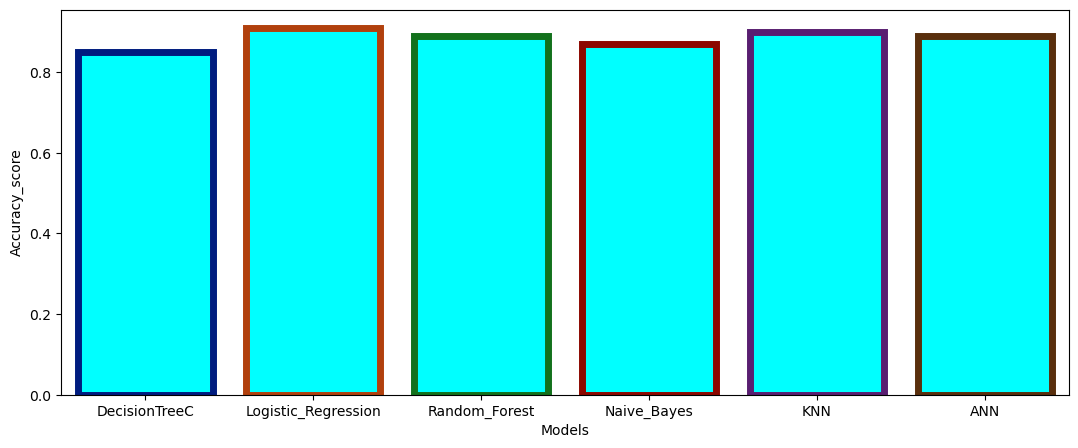

In [964]:
plt.rcParams['figure.figsize']=(13,5)
sns.barplot(x=model,y=accuracy,data=s,palette='husl',edgecolor=sns.color_palette('dark'),facecolor=(0,1,1,1),linewidth=5)
plt.xlabel('Models')
plt.ylabel('Accuracy_score')

Accuracy is based on regression(Target is runs)

In [894]:
Model=["DecisionTree","Random_ForestRegressor","Ridge Regression","lasso Regression","Linear Regression"]
r2_score=[0.9722,0.98,0.69,0.69,0.99]

In [895]:
t=pd.DataFrame({"Model":Model,"r2_score":r2_score}).sort_values(by='r2_score',ascending=False)

In [896]:
t.reset_index(drop=True,inplace=True)
t

,Model,r2_score
0,Linear Regression,0.9900
1,Random_ForestRegressor,0.9800
2,DecisionTree,0.9722
3,Ridge Regression,0.6900
4,lasso Regression,0.6900


Text(0, 0.5, 'r2_score')

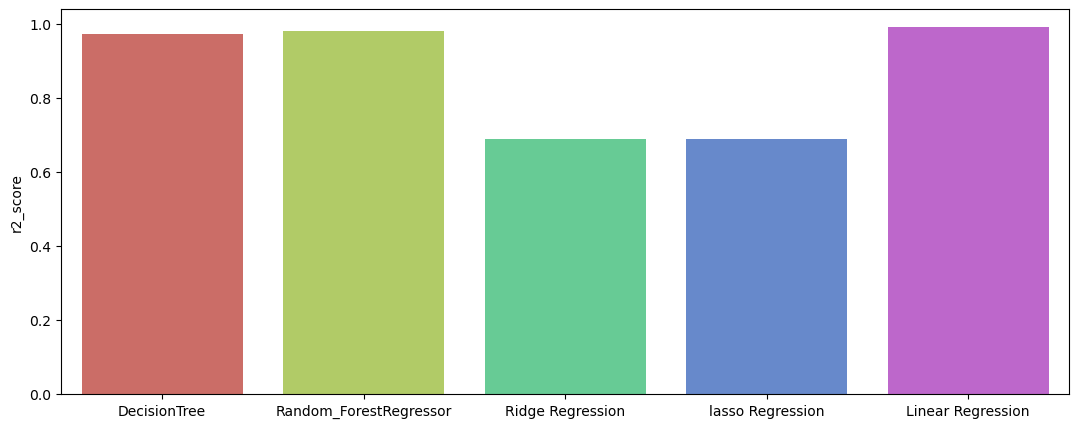

In [897]:
sns.barplot(x=Model,y=r2_score,data=t,palette='hls',linewidth=5)
sns.color_palette("vlag", as_cmap=True)
plt.ylabel('r2_score')

Accuracy is based on regression(Target is Average)

In [898]:
Model=["DecisionTree","Random_ForestRegressor","Ridge Regression"]
r2score=[0.42,0.78,0.27]

In [899]:
u=pd.DataFrame({"Model":Model,"r2score":r2score}).sort_values(by='r2score',ascending=False)
u.reset_index(drop=True,inplace=True)
u

,Model,r2score
0,Random_ForestRegressor,0.78
1,DecisionTree,0.42
2,Ridge Regression,0.27


Text(0, 0.5, 'r2_score')

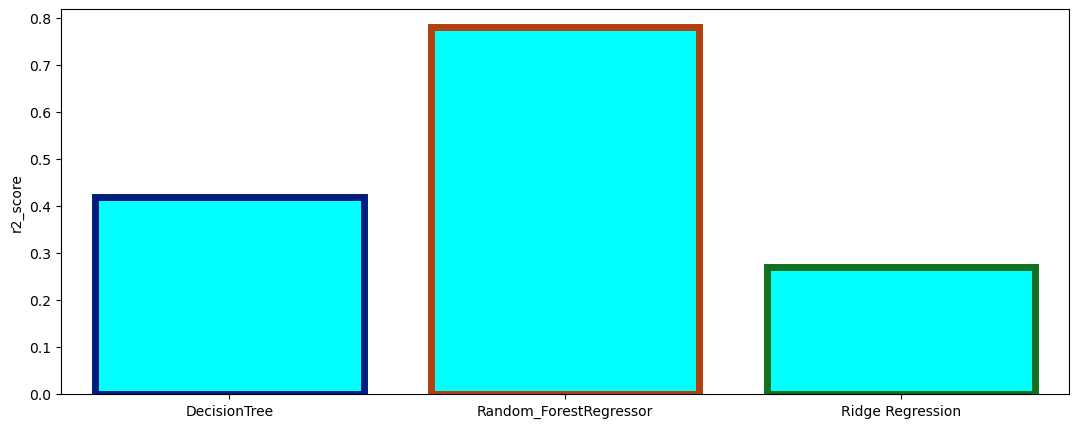

In [903]:
sns.barplot(x=Model,y=r2score,data=u,palette='husl',linewidth=5,edgecolor=sns.color_palette('dark'),facecolor=(0,1,1,1))
sns.color_palette("vlag", as_cmap=True)
plt.ylabel('r2_score')

# Conclusion 

Classification Models( Target is Average Level)
- I want to predict the average level,So based on other relative columns to gave the 6 models and check that training accuracy.
- Out of All models I got Logistic regression accuracy is 91% is more

Regression Models (Target is Runs)
- I want to predict the Runs,So based on other relative columns to gave the 5 models and check that r2_score.
- Out of All models I got Linear regression accuracy is 99% is more

Regression Models(Target is Average)
- I want to predict the average,So based on other relative columns to gave the 3 models and check that r_score.
- Out of All models I got RandomForest accuracy is 78% is more



# Predict the outside Value

Classification Model(Target is Average Level)


In [982]:
Match=int(input('Enter the Match: '))
Runs=int(input('Enter the Runs: '))
Hundreds=int(input('Enter the hundreds: '))
Fifties=int(input('Enter the Fifties: '))
Prediction = model.predict([[Match,Runs,Hundreds,Fifties]])
print(Prediction[0])

Enter the Match: 100
Enter the Runs: 7000
Enter the hundreds: 35
Enter the Fifties: 40
Perfect


C:\Users\gnane\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Regression Model(Target is Runs)

In [1037]:
Innings=int(input('Enter the Innings: '))
Hundreds=int(input('Enter the hundreds: '))
Fifties=int(input('Enter the Fifties: '))

Prediction=ln.predict([[Innings,Hundreds,Fifties]])
print(round(Prediction[0]))

Enter the Innings: 500
Enter the hundreds: 40
Enter the Fifties: 78
17327


Regression Model(Target is Average)

In [1072]:
Innings=int(input('Enter the Innings: '))
Notouts=int(input("Enter the Nottout: "))
Runs=int(input('Enter the Runs: '))
Zeros=int(input('Enter the Zeros: '))

prediction=rr.predict([[Innings,Notouts,Runs,Zeros]])
print(round(prediction[0],2))

Enter the Innings: 300
Enter the Nottout: 20
Enter the Runs: 15000
Enter the Zeros: 20
50.57


C:\Users\gnane\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
